In [0]:
%matplotlib inline
import fancyimpute
import matplotlib.pyplot as plt
import missingno as mn
import numpy as np
import pandas as pd
import seaborn as sns

import io
import urllib.request as req
import zipfile


In [6]:
# https://github.com/cshen3/Data/raw/master/jaypeedevlin-lending-club-loan-data-2007-11%202%20(1).zip
# https://github.com/cshen3/Data/raw/master/RRL%20Data.xlsx

url = 'https://github.com/cshen3/Data/raw/master/RRL%20Data.xlsx'
df = pd.read_excel(url)
df
#url = 'https://github.com/cshen3/Data/raw/master/jaypeedevlin-lending-club-loan-data-2007-11%202%20(1).zip'
#fin = req.urlopen(url)

#with zipfile.ZipFile(io.BytesIO(fin.read())) as z:
    #print(z.namelist())
    #kag = pd.read_csv(z.open('jaypeedevlin-lending-club-loan-data-2007-11/lending_club_loans.csv'))
    #kag_questions = kag.iloc[0]
    #df = kag.iloc[1:]

,Borrower,Team Code,Revenue Category,Niche,CRR,Facility Type,Commitment,TPL,As of Date,Avg TTM ARR,Growth Rate (Quarterly YoY),Gross Margins,Gross Retention,Tenor at Close,Tenor Ext Milestone,Max Adv Rate,Adv Rate Step-Downs,Churn Modifier,Operating Covenant,Liquidity Covenant,Warrant,Post-$ / Market Cap,Maturity Date
0,"1debit, Inc",12X,Repeatable,NaN,3,IRR,25000000.0,32260000,2018-06-30,28700000,4.030,0.610,1.000,2.0,NaN,3.0,No,None,Revenue,None,No,470000000,2020-11-21
1,Accent-Technologies,73A,Subscription,NaN,7,IRR,3000000.0,4750000,2017-12-31,4700000,0.123,0.810,0.940,2.0,NaN,3.5,No,Net Rev,None,RML,No,Unknown,2020-06-25
2,Act-On Software Inc,51A,Recurring,NaN,4,MRR,7500000.0,11450000,2018-12-31,44287600,-0.130,0.762,0.680,1.0,NaN,3.0,No,Net Rev,EBITDA,Liquidity Ratio,Yes,315000000,2020-12-31
3,Aerospike Inc,30B,Subscription,NaN,3,IRR,4000000.0,4150000,2019-03-31,15737600,0.534,0.822,0.915,1.0,NaN,4.0,No,Net Rev,None,None,No,87000000,2020-04-30
4,"AFFECTLAYER, INC.",27A,Subscription,NaN,3,IRR,5000000.0,10000000,2018-09-30,1537600,NaN,0.450,0.877,2.0,NaN,4.0,No,Gross Rev,None,None,No,93000000,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Yottaa Inc.,65A,Subscription,Software,3,IRR,5000000.0,5100000,2018-09-30,8087600,0.470,0.700,0.869,1.0,No,4.0,No,Net Rev,None,None,Yes,55000000,2020-12-31
153,Zapproved,51A,Subscription,Software,3,IRR,5000000.0,5535000,2018-06-30,14351796,0.400,0.900,0.966,2.0,No,4.0,No,Gross Rev,Revenue,Cash + Avail,No,108300000,2020-10-15
154,"Zenreach, Inc.",30E,Subscription,Software,3,MRR,3000000.0,9200000,2017-09-30,7508000,1.420,0.680,0.640,2.0,No,4.0,No,Gross Rev,Revenue,None,No,229000000,2019-12-31
155,"Ziprecruiter, Inc.",78A,Recurring,Software,3,IRR,20000000.0,45000000,2019-06-30,350435000,0.197,0.870,-0.015,3.0,No,3.0,No,None,Rev Growth Rate,RML,No,1000000000,2021-11-28


In [30]:
df.dtypes

Borrower                             object
Team Code                            object
Revenue Category                     object
Niche                                object
CRR                                   int64
facility_type                        object
Commitment                          float64
TPL                                   int64
As of Date                   datetime64[ns]
avg_TTM_ARR                           int64
growth_rate_quarterly_yoy           float64
gross_margins                       float64
gross_retention                     float64
tenor_at_close                      float64
Tenor Ext Milestone                  object
max_adv_rate                        float64
adv_rate_step_downs                  object
churn_modifier                       object
operating_cov                        object
liquidity_cov                        object
Warrant                              object
post_money_market_cap                object
maturity                     dat

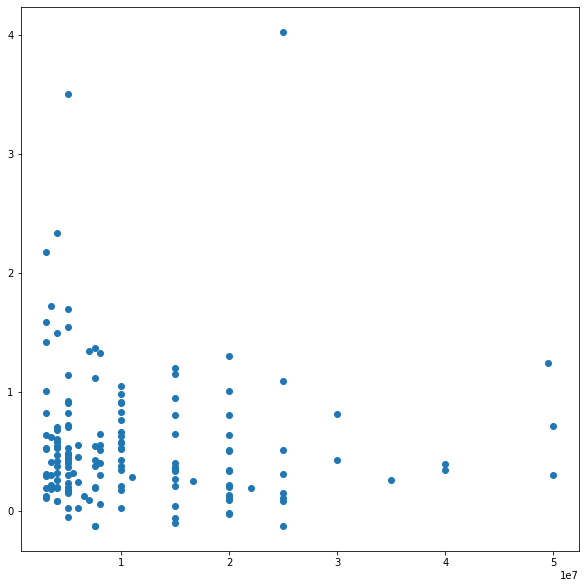

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df['Commitment'], df['growth_rate_quarterly_yoy'], linestyle='', marker='o')

(0, 413023870.0120616)

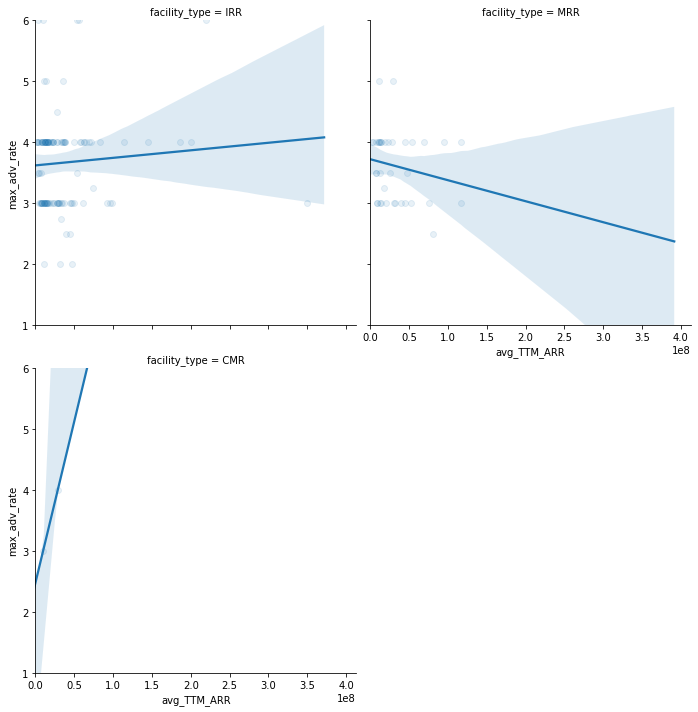

In [58]:
sns.lmplot(y='max_adv_rate', x='avg_TTM_ARR', data = df, col = 'facility_type', col_wrap = 2, scatter_kws={'alpha':.1})
plt.ylim(1, 6)
plt.xlim(0, None)

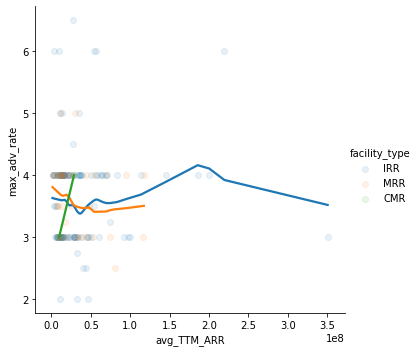

In [59]:
mask = df.facility_type.isin(['IRR','MRR','CMR'])
sns.lmplot(y='max_adv_rate', x='avg_TTM_ARR', data = df[mask], lowess=True, scatter_kws={'alpha':.1}, hue='facility_type')
#mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
#sns.lmplot('city08', 'highway08', data=auto[mask], lowess=True,
          # scatter_kws={'alpha':.4}, hue='make')

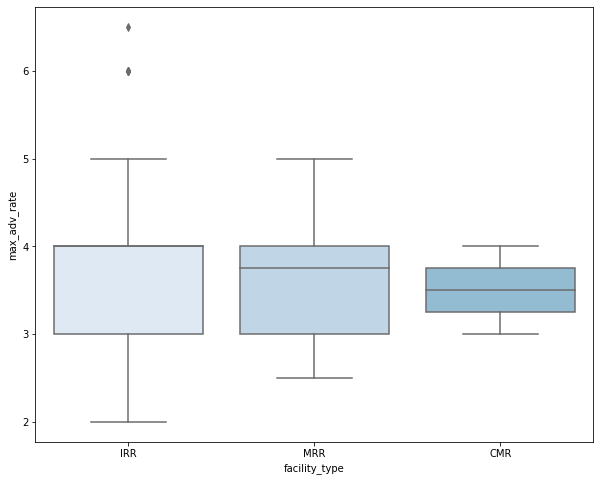

In [72]:
with sns.color_palette('Blues'):
  fig, ax = plt.subplots(figsize=(10,8))
  sns.boxplot(x="facility_type", y="max_adv_rate", data=df, ax=ax)

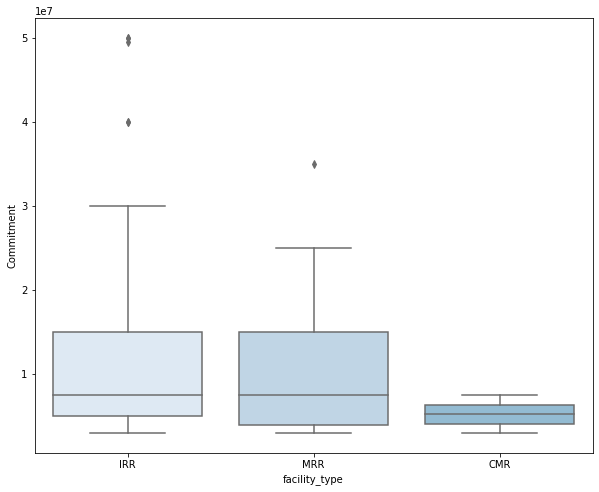

In [73]:
with sns.color_palette('Blues'):
  fig, ax = plt.subplots(figsize=(10,8))
  sns.boxplot(x="facility_type", y="Commitment", data=df, ax=ax)

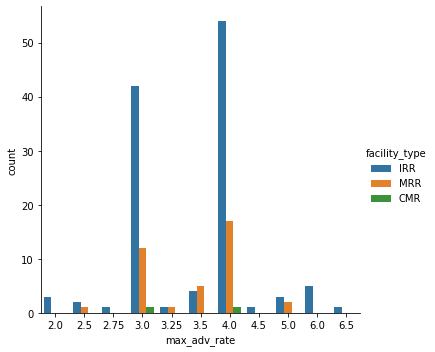

In [65]:
sns.catplot(x="max_adv_rate", hue="facility_type", kind="count", data=df);

In [67]:
df.groupby('facility_type')[['max_adv_rate']].describe()

max_adv_rate                                                
                     count      mean       std  min   25%   50%   75%  max
facility_type                                                             
CMR                    2.0  3.500000  0.707107  3.0  3.25  3.50  3.75  4.0
IRR                  117.0  3.666667  0.820665  2.0  3.00  4.00  4.00  6.5
MRR                   38.0  3.611842  0.577440  2.5  3.00  3.75  4.00  5.0

In [74]:
df.groupby('facility_type')[['Commitment']].describe()

Commitment                ...                        
                   count          mean  ...         75%         max
facility_type                           ...                        
CMR                  2.0  5.250000e+06  ...   6375000.0   7500000.0
IRR                117.0  1.130977e+07  ...  15000000.0  50000000.0
MRR                 38.0  1.032895e+07  ...  15000000.0  35000000.0

[3 rows x 8 columns]

In [53]:
df.churn_modifier.value_counts()

Gross Rev    74
Net Rev      42
None         29
Logo         12
Name: churn_modifier, dtype: int64

In [54]:
df.describe()

,CRR,Commitment,TPL,avg_TTM_ARR,growth_rate_quarterly_yoy,gross_margins,gross_retention,tenor_at_close,max_adv_rate
count,157.000000,1.570000e+02,1.570000e+02,1.570000e+02,155.000000,157.000000,157.000000,157.000000,157.000000
mean,3.369427,1.099518e+07,1.564290e+07,3.481020e+07,0.559452,0.691879,0.846703,1.812102,3.651274
std,0.753510,9.539703e+06,1.234833e+07,4.370971e+07,0.576443,0.156551,0.158746,0.689700,0.764160
min,3.000000,3.000000e+06,3.200000e+06,1.400000e+06,-0.130000,-0.020000,-0.015000,0.500000,2.000000
25%,3.000000,4.500000e+06,6.800000e+06,1.121430e+07,0.202500,0.625000,0.803000,1.000000,3.000000
50%,3.000000,7.500000e+06,1.133480e+07,1.977520e+07,0.424000,0.720000,0.887000,2.000000,4.000000
75%,4.000000,1.500000e+07,2.000000e+07,4.428760e+07,0.703500,0.790000,0.950000,2.000000,4.000000
max,7.000000,5.000000e+07,6.500000e+07,3.504350e+08,4.030000,1.000000,1.000000,5.000000,6.500000


In [7]:
df.corr(method='spearman').style.background_gradient()

,CRR,Commitment,TPL,Avg TTM ARR,Growth Rate (Quarterly YoY),Gross Margins,Gross Retention,Tenor at Close,Max Adv Rate
CRR,1,-0.0835039,-0.0407581,-0.0607956,-0.155775,0.00386653,-0.111201,-0.172775,-0.105961
Commitment,-0.0835039,1,0.808658,0.775299,-0.0971867,-0.0108552,0.124982,0.177057,0.266859
TPL,-0.0407581,0.808658,1,0.663023,-0.010676,-0.0815853,0.0770611,0.242012,0.158259
Avg TTM ARR,-0.0607956,0.775299,0.663023,1,-0.341533,0.0100792,0.0992594,0.0294341,-0.0406506
Growth Rate (Quarterly YoY),-0.155775,-0.0971867,-0.010676,-0.341533,1,-0.0980589,0.0410041,0.137481,0.133405
Gross Margins,0.00386653,-0.0108552,-0.0815853,0.0100792,-0.0980589,1,-0.126044,-0.154144,0.138006
Gross Retention,-0.111201,0.124982,0.0770611,0.0992594,0.0410041,-0.126044,1,0.12053,0.0698581
Tenor at Close,-0.172775,0.177057,0.242012,0.0294341,0.137481,-0.154144,0.12053,1,0.134841
Max Adv Rate,-0.105961,0.266859,0.158259,-0.0406506,0.133405,0.138006,0.0698581,0.134841,1


In [0]:
df.loc[df.annual_inc==6000000]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
30176,513542,663575.0,5000.0,5000.0,5000.0,36 months,12.73%,167.84,C,C1,post office,10+ years,MORTGAGE,6000000.0,Source Verified,May-2010,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,home improvment,939xx,CA,0.01,0.0,Jan-2001,710.0,714.0,1.0,80.0,NaN,2.0,0.0,1434.0,37.7%,10.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [0]:
df.dtypes

id                             object
member_id                     float64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 115, dtype: object

In [0]:
df.loan_status.value_counts(dropna = False)

Fully Paid                                             33585
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
NaN                                                        3
Default                                                    1
Name: loan_status, dtype: int64

In [0]:
df.isna().mean()*100

id                              0.000000
member_id                       0.007053
loan_amnt                       0.007053
funded_amnt                     0.007053
funded_amnt_inv                 0.007053
                                 ...    
tax_liens                       0.253897
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 115, dtype: float64

In [0]:
def clean_data(df):
  def cut_lc(df):
    return (df
      [['loan_amnt', 'term','int_rate','emp_length','revol_util','home_ownership','annual_inc','loan_status','fico_range_low']]
      )
  df = cut_lc(df)
  df2=df.dropna(axis=1,how='all')
  df3=df2.dropna(axis=0,how='all')
  loansize=(df3.loan_amnt)
  term=(df3.term.str.slice(0,3).astype(float))
  interest=(df3.int_rate.str.slice(0,5).astype(float))
  income = (df3.annual_inc.fillna(0))
  employ_length = (df3.emp_length.fillna(0)
  .str.replace('+','')
  .str.replace('<','')
  .str.replace('year','')
  .str.replace('s','')
  .astype(float))
  loan_util = (df3.revol_util.str.replace('%','').astype(float).fillna(0))
  loan_stat = (df3.loan_status
    .str.replace('Does not meet the credit policy. Status:Fully Paid','Fully Paid')
    .str.replace('Does not meet the credit policy. Status:Charged Off','Charged Off')
    .str.replace('(','')
    .str.replace(')','')
    .str.replace('Default','Late/Default')
    .str.replace(' 31-120 days','/Default')
    .str.replace('Late 16-30 days','Late/Default'))
  home = df3.home_ownership
  fico = df3.fico_range_low
  
  return pd.concat([loansize, term, interest, loan_util, loan_stat, income, employ_length, home, fico], axis=1)
  


df = clean_data(df)


In [0]:
df

,loan_amnt,term,int_rate,revol_util,loan_status,annual_inc,emp_length,home_ownership,fico_range_low
1,2500.0,60.0,15.2,9.4,Charged Off,30000.0,1.0,RENT,740.0
2,2400.0,36.0,15.9,98.5,Fully Paid,12252.0,10.0,RENT,735.0
3,10000.0,36.0,13.4,21.0,Fully Paid,49200.0,10.0,RENT,690.0
4,3000.0,60.0,12.6,53.9,Current,80000.0,1.0,RENT,695.0
5,5000.0,36.0,7.9,28.3,Fully Paid,36000.0,3.0,RENT,730.0
...,...,...,...,...,...,...,...,...,...
42531,3500.0,36.0,10.2,0.0,Fully Paid,180000.0,1.0,RENT,685.0
42532,1000.0,36.0,9.6,0.0,Fully Paid,12000.0,1.0,RENT,695.0
42533,2525.0,36.0,9.3,0.0,Fully Paid,110000.0,1.0,RENT,710.0
42534,6500.0,36.0,8.3,0.0,Fully Paid,0.0,1.0,NONE,740.0


In [0]:
df=df.dropna(axis=1,how='all')
df=df.dropna(axis=0,how='all')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Oct-2016,Sep-2016,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,730.0,734.0,3.0,NaN,NaN,9.0,0.0,7963.0,28.3%,12.0,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-2015,161.03,NaN,Jan-2016,679.0,675.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,NaN,< 1 year,RENT,110000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,https://lendingclub.com/browse/loanDetail.acti...,"I need to pay $2,100 for fixing my Volvo :) A...",other,Car repair bill,100xx,NY,10.00,NaN,NaN,710.0,714.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.00,0.00,2904.498829,258.82,2525.00,379.50,0.00,0.00,0.00,Jun-2010,82.03,Jul-2010,May-2007,714.0,710.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,NaN,< 1 year,NONE,NaN,No

In [0]:
df.isna().mean()*100

id                          0.000000
member_id                   0.007053
loan_amnt                   0.007053
funded_amnt                 0.007053
funded_amnt_inv             0.007053
                              ...   
acc_now_delinq              0.075229
chargeoff_within_12_mths    0.347932
delinq_amnt                 0.075229
pub_rec_bankruptcies        3.216024
tax_liens                   0.253897
Length: 61, dtype: float64

In [0]:
def cut_lc(df):
  return (df
[['loan_amnt', 'term','int_rate','emp_length','home_ownership','annual_inc','loan_status','fico_range_low','revol_bal','revol_util']]
)
df2 = cut_lc(df)
df2

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,fico_range_low,revol_bal,revol_util
1,2500.0,60 months,15.27%,< 1 year,RENT,30000.0,Charged Off,740.0,1687.0,9.4%
2,2400.0,36 months,15.96%,10+ years,RENT,12252.0,Fully Paid,735.0,2956.0,98.5%
3,10000.0,36 months,13.49%,10+ years,RENT,49200.0,Fully Paid,690.0,5598.0,21%
4,3000.0,60 months,12.69%,1 year,RENT,80000.0,Current,695.0,27783.0,53.9%
5,5000.0,36 months,7.90%,3 years,RENT,36000.0,Fully Paid,730.0,7963.0,28.3%
...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,36 months,9.33%,< 1 year,RENT,110000.0,Does not meet the credit policy. Status:Fully ...,710.0,0.0,NaN
42534,6500.0,36 months,8.38%,< 1 year,NONE,NaN,Does not meet the credit policy. Status:Fully ...,740.0,0.0,NaN
42535,5000.0,36 months,7.75%,10+ years,MORTGAGE,70000.0,Does not meet the credit policy. Status:Fully ...,770.0,0.0,NaN
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df3 = df2.dropna(axis=0,how='all')
df3

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,fico_range_low,revol_bal,revol_util
1,2500.0,60 months,15.27%,< 1 year,RENT,30000.0,Charged Off,740.0,1687.0,9.4%
2,2400.0,36 months,15.96%,10+ years,RENT,12252.0,Fully Paid,735.0,2956.0,98.5%
3,10000.0,36 months,13.49%,10+ years,RENT,49200.0,Fully Paid,690.0,5598.0,21%
4,3000.0,60 months,12.69%,1 year,RENT,80000.0,Current,695.0,27783.0,53.9%
5,5000.0,36 months,7.90%,3 years,RENT,36000.0,Fully Paid,730.0,7963.0,28.3%
...,...,...,...,...,...,...,...,...,...,...
42531,3500.0,36 months,10.28%,< 1 year,RENT,180000.0,Does not meet the credit policy. Status:Fully ...,685.0,0.0,NaN
42532,1000.0,36 months,9.64%,< 1 year,RENT,12000.0,Does not meet the credit policy. Status:Fully ...,695.0,0.0,NaN
42533,2525.0,36 months,9.33%,< 1 year,RENT,110000.0,Does not meet the credit policy. Status:Fully ...,710.0,0.0,NaN
42534,6500.0,36 months,8.38%,< 1 year,NONE,NaN,Does not meet the credit policy. Status:Fully ...,740.0,0.0,NaN


In [0]:
df3.isna().mean()*100

loan_amnt         0.000000
term              0.000000
int_rate          0.000000
emp_length        2.614379
home_ownership    0.000000
annual_inc        0.009404
loan_status       0.000000
fico_range_low    0.000000
revol_bal         0.000000
revol_util        0.211595
dtype: float64

In [0]:
df3.dtypes

loan_amnt         float64
term               object
int_rate           object
emp_length         object
home_ownership     object
annual_inc        float64
loan_status        object
fico_range_low    float64
revol_bal         float64
revol_util         object
dtype: object

In [0]:
df3.emp_length.value_counts(dropna = False)

10+ years    9368
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
NaN          1112
Name: emp_length, dtype: int64

In [0]:
salary_namask = df3.annual_inc.isna()
df3[salary_namask].emp_length.value_counts()

< 1 year    4
Name: emp_length, dtype: int64

In [0]:
def fill_sal(df):
  
  return (df
    .assign(
        annual_inc = df.annual_inc.fillna(0))
    [['loan_amnt', 'term','int_rate','emp_length','home_ownership','annual_inc','loan_status','fico_range_low','revol_bal','revol_util']]
         )
df4 = fill_sal(df3)
df4


,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,fico_range_low,revol_bal,revol_util
1,2500.0,60 months,15.27%,< 1 year,RENT,30000.0,Charged Off,740.0,1687.0,9.4%
2,2400.0,36 months,15.96%,10+ years,RENT,12252.0,Fully Paid,735.0,2956.0,98.5%
3,10000.0,36 months,13.49%,10+ years,RENT,49200.0,Fully Paid,690.0,5598.0,21%
4,3000.0,60 months,12.69%,1 year,RENT,80000.0,Current,695.0,27783.0,53.9%
5,5000.0,36 months,7.90%,3 years,RENT,36000.0,Fully Paid,730.0,7963.0,28.3%
...,...,...,...,...,...,...,...,...,...,...
42531,3500.0,36 months,10.28%,< 1 year,RENT,180000.0,Does not meet the credit policy. Status:Fully ...,685.0,0.0,NaN
42532,1000.0,36 months,9.64%,< 1 year,RENT,12000.0,Does not meet the credit policy. Status:Fully ...,695.0,0.0,NaN
42533,2525.0,36 months,9.33%,< 1 year,RENT,110000.0,Does not meet the credit policy. Status:Fully ...,710.0,0.0,NaN
42534,6500.0,36 months,8.38%,< 1 year,NONE,0.0,Does not meet the credit policy. Status:Fully ...,740.0,0.0,NaN


In [0]:
df4.isna().mean()*100

loan_amnt         0.000000
term              0.000000
int_rate          0.000000
emp_length        2.614379
home_ownership    0.000000
annual_inc        0.000000
loan_status       0.000000
fico_range_low    0.000000
revol_bal         0.000000
revol_util        0.211595
dtype: float64

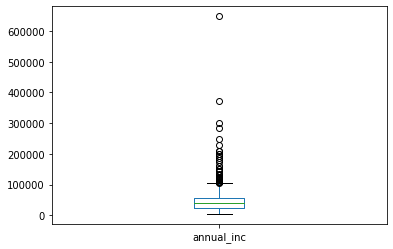

In [0]:
length_namask = df4.emp_length.isna()
na_mask = df4[length_namask].annual_inc
na_mask.plot.box()


In [0]:
na_mask.describe()

count      1112.000000
mean      45983.241835
std       37131.003746
min        4200.000000
25%       25000.000000
50%       38563.560000
75%       57600.000000
max      648000.000000
Name: annual_inc, dtype: float64

In [0]:
df4.isna().mean()*100

loan_amnt         0.000000
term              0.000000
int_rate          0.000000
emp_length        2.614379
home_ownership    0.000000
annual_inc        0.000000
loan_status       0.000000
fico_range_low    0.000000
revol_bal         0.000000
revol_util        0.211595
dtype: float64

In [0]:
df5 = df4.fillna(0)

In [0]:
df5.isna().mean()*100

loan_amnt         0.0
term              0.0
int_rate          0.0
emp_length        0.0
home_ownership    0.0
annual_inc        0.0
loan_status       0.0
fico_range_low    0.0
revol_bal         0.0
revol_util        0.0
dtype: float64

In [0]:
df5.dtypes

loan_amnt         float64
term               object
int_rate           object
emp_length         object
home_ownership     object
annual_inc        float64
loan_status        object
fico_range_low    float64
revol_bal         float64
revol_util         object
dtype: object

In [0]:
df5.revol_util.str.replace('%','').astype(float).fillna(0)

1         9.4
2        98.5
3        21.0
4        53.9
5        28.3
         ... 
42531     0.0
42532     0.0
42533     0.0
42534     0.0
42535     0.0
Name: revol_util, Length: 42534, dtype: float64

In [0]:
df5.term.str.slice(0,3).astype(int)

1        60
2        36
3        36
4        60
5        36
         ..
42531    36
42532    36
42533    36
42534    36
42535    36
Name: term, Length: 42534, dtype: int64

In [0]:
df5.int_rate.str.slice(0,5).astype(float)

1        15.2
2        15.9
3        13.4
4        12.6
5         7.9
         ... 
42531    10.2
42532     9.6
42533     9.3
42534     8.3
42535     7.7
Name: int_rate, Length: 42534, dtype: float64

In [0]:
(df5.emp_length
  .str.replace('+','')
  .str.replace('<','')
  .str.replace('year','')
  .str.replace('s','')
).astype(float)

1         1.0
2        10.0
3        10.0
4         1.0
5         3.0
         ... 
42531     1.0
42532     1.0
42533     1.0
42534     1.0
42535    10.0
Name: emp_length, Length: 42534, dtype: float64

In [0]:
df5.home_ownership.value_counts()

RENT        20180
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [0]:
(df5.loan_status
 .str.replace('Does not meet the credit policy. Status:Fully Paid','Fully Paid')
 .str.replace('Does not meet the credit policy. Status:Charged Off','Charged Off')
 .str.replace('(','')
 .str.replace(')','')
 .str.replace('Default','Late/Default')
 .str.replace(' 31-120 days','/Default')
 .str.replace('Late 16-30 days','Late/Default')
.value_counts()
)

Fully Paid         35573
Charged Off         6414
Current              513
Late/Default          18
In Grace Period       16
Name: loan_status, dtype: int64